In [18]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/My Drive/Colab Notebooks/IEDA2540/"
%ls

/content/drive/My Drive/Colab Notebooks/IEDA2540
crop.csv


### Task 1

In [3]:
import pandas as pd
from scipy.stats import f

# Load the dataset
df = pd.read_csv('crop.csv')
df

,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486
...,...,...,...,...
91,2,4,3,177.405292
92,1,1,3,178.141644
93,2,2,3,177.710613
94,1,3,3,177.687264


In [4]:
# Separate the data into two groups based on density level
low_density = df[df['density'] == 1]['yield']
high_density = df[df['density'] == 2]['yield']

# Calculate the variances of each group
var_low_density = low_density.var()
var_high_density = high_density.var()

# Calculate the F-statistic
f_statistic = var_high_density / var_low_density

print(var_low_density, var_high_density, f_statistic)

0.3687499582954034 0.41492135114034545 1.2660988291545212


In [5]:
# Calculate the degrees of freedom
df1 = len(high_density) - 1  
df2 = len(low_density) - 1

# Calculate the p-value
p_value = 1 - f.cdf(f_statistic, df1, df2)

print(df1, df2, p_value)

47 47 0.2108291398215989


In [6]:
# Print the results
print('f statistic: ', f_statistic)
print('p-value: ', p_value)

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis, there is no significant difference in variances between the two groups.")
else:
    print("Reject the null hypothesis, there is a significant difference in variances between the two groups.")

f statistic:  1.2660988291545212
p-value:  0.2108291398215989
Fail to reject the null hypothesis, there is no significant difference in variances between the two groups.


### Task 2

In [7]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
crop_df = pd.read_csv("crop.csv")

# Split the dataset into two groups based on planting density
low_density = crop_df[crop_df['density'] == 1]['yield']
high_density = crop_df[crop_df['density'] == 2]['yield']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(low_density, high_density)

# Print the results
print("T-statistic: ", t_stat)
print("p-value: ", p_value)

if p_value < 0.05:
    print("We reject the null hypothesis that the means are equal.")
else:
    print("We fail to reject the null hypothesis that the means are equal.")

T-statistic:  -3.6153828803630663
p-value:  0.00048451706997438567
We reject the null hypothesis that the means are equal.


### Task 3

Fertilizer 1: p-value for normality test = 0.8512424267132028
Fertilizer 2: p-value for normality test = 0.9903737762394893
Fertilizer 3: p-value for normality test = 0.22433307516500456


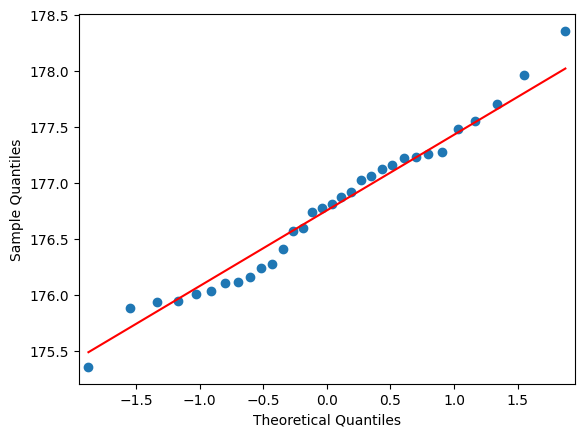

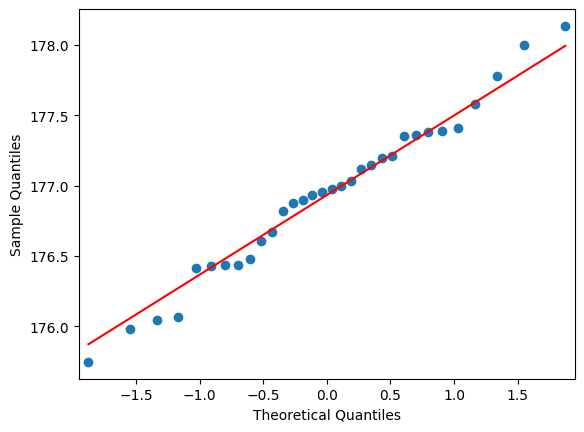

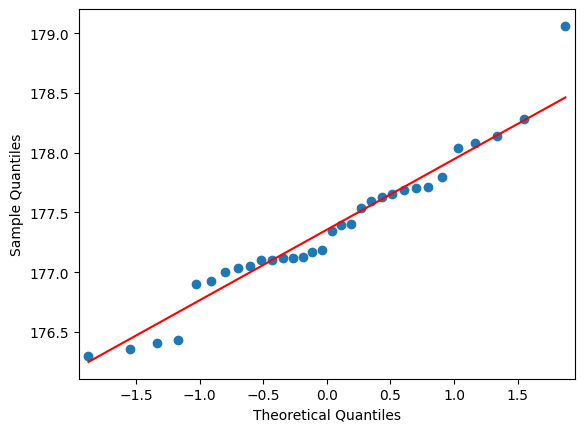

In [8]:
#Task 3 a)
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv('crop.csv')

for f in [1, 2, 3]:
    data = df[df['fertilizer'] == f]['yield']
    sm.qqplot(data, line='s')

for f in [1, 2, 3]:
    data = df[df['fertilizer'] == f]['yield']
    _, p_value = stats.normaltest(data)
    print(f"Fertilizer {f}: p-value for normality test = {p_value}")

<Axes: xlabel='fertilizer', ylabel='yield'>

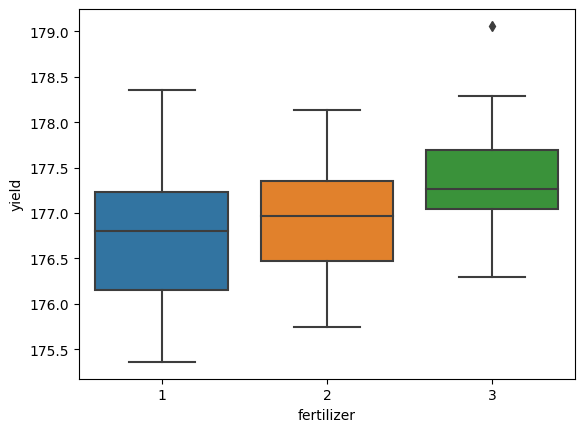

In [9]:
# Task 3 b)
sns.boxplot(x='fertilizer', y='yield', data=df)

In [20]:
# Task 3 c)
data1 = df[df['fertilizer'] == 1]['yield']
data2 = df[df['fertilizer'] == 2]['yield']
data3 = df[df['fertilizer'] == 3]['yield']
_, p_value = stats.bartlett(data1, data2, data3)
print(f"p-value for Bartlett's test = {p_value}")

p-value for Bartlett's test = 0.5879451367215631


In [12]:
#Task 3 d)
anova_test = stats.f_oneway(df['yield'].loc[df['fertilizer'] == 1], df['yield'].loc[df['fertilizer'] == 2], df['yield'].loc[df['fertilizer'] == 3])
print(anova_test)

F_onewayResult(statistic=7.862751645215487, pvalue=0.0006999157502874401)


In [23]:
# Task 3 e)
print(stats.ttest_ind(data1, data2, equal_var=True))
print(stats.ttest_ind(data2, data3, equal_var=True))
print(stats.ttest_ind(data1, data3, equal_var=True))

Ttest_indResult(statistic=-1.1151144203063068, pvalue=0.26910515103133803)
Ttest_indResult(statistic=-2.8834962237133284, pvalue=0.005400051057378574)
Ttest_indResult(statistic=-3.7244341523148, pvalue=0.00042491974838636016)


In [24]:
0.05/6

0.008333333333333333

In [25]:
# Task 3 f)
hsd = stats.tukey_hsd(data1, data2, data3)
print(hsd)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.176     0.495    -0.546     0.194
 (0 - 2)     -0.599     0.001    -0.969    -0.229
 (1 - 0)      0.176     0.495    -0.194     0.546
 (1 - 2)     -0.423     0.021    -0.793    -0.053
 (2 - 0)      0.599     0.001     0.229     0.969
 (2 - 1)      0.423     0.021     0.053     0.793

